In [50]:
import os
import json
import shapely
import shapely.geometry
import numpy as np
from tqdm import tqdm

In [48]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 100.0 MB/s eta 0:00:00


In [44]:
with open('track-results/jnc00.mp4.t.json', 'r') as f:
    data = json.load(f)


In [45]:
width = 0
height = 0

In [51]:
ious = dict()

for tid, poss in tqdm(data.items(), total=len(data)):
    for idx, (id1, *bound1) in enumerate(poss[:-1]):
        ious[(tid, id1)] = {
            'expected': [],
            'original': [],
        }
        width = max(width, bound1[2])
        height = max(height, bound1[3])

        box1 = shapely.geometry.box(*bound1)
        cpoint = box1.centroid
        nposs = poss[idx + 1]
        nid  = nposs[0]
        nbox1 = shapely.geometry.box(*nposs[1:])
        ncpoint = nbox1.centroid
        velocity = (np.array(ncpoint.xy) - np.array(cpoint.xy)).flatten() * (nid - id1)
        for id2, *bound2 in poss[idx + 1:]:
            box2 = shapely.geometry.box(*bound2)
            intersection = box1.intersection(box2)
            union = box1.union(box2)
            iou1 = intersection.area / union.area

            t = velocity * (id2 - id1)
            box1_ = shapely.affinity.translate(box1, *t)
            intersection = box1_.intersection(box2)
            union = box1_.union(box2)
            iou2 = intersection.area / union.area

            ious[(tid, id1)]['original'].append((id2, id2 - id1, iou1, cpoint))
            ious[(tid, id1)]['expected'].append((id2, id2 - id1, iou2, cpoint))

            if iou1 < 0.3 and iou2 < 0.3:
                break



Exception ignored in: <function tqdm.__del__ at 0x7febdebd4680>
Traceback (most recent call last):
  File "/data/chanwutk/projects/polyis/.venv/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/data/chanwutk/projects/polyis/.venv/lib/python3.13/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'








































































































































































































































































































100%|██████████| 604/604 [37:41<00:00,  3.74s/it]


In [ ]:
ious = dict()

for tid, poss in data.items():
    for idx, (id1, *bound1) in enumerate(poss[:-1]):
        ious[(tid, id1)] = {
            'expected': [],
            'original': [],
        }
        width = max(width, bound1[2])
        height = max(height, bound1[3])

        box1 = shapely.geometry.box(*bound1)
        cpoint = box1.centroid
        nposs = poss[idx + 1]
        nid  = nposs[0]
        nbox1 = shapely.geometry.box(*nposs[1:])
        ncpoint = nbox1.centroid
        velocity = (np.array(ncpoint.xy) - np.array(cpoint.xy)).flatten() * (nid - id1)
        for id2, *bound2 in poss[idx + 1:]:
            box2 = shapely.geometry.box(*bound2)
            intersection = box1.intersection(box2)
            union = box1.union(box2)
            iou1 = intersection.area / union.area

            t = velocity * (id2 - id1)
            box1_ = shapely.affinity.translate(box1, *t)
            intersection = box1_.intersection(box2)
            union = box1_.union(box2)
            iou2 = intersection.area / union.area

            ious[(tid, id1)]['original'].append((id2, id2 - id1, iou1, cpoint))
            ious[(tid, id1)]['expected'].append((id2, id2 - id1, iou2, cpoint))

            if iou1 < 0.3 and iou2 < 0.3:
                break

In [ ]:
bin = np.zeros(((height // 128) + 1, (width // 128) + 1), dtype=np.float32)
count = np.zeros(((height // 128) + 1, (width // 128) + 1), dtype=int)

In [ ]:
for (tid, id1), iou in ious.items():
    id2, skip_dist, iou1, cpoint = iou['expected'][-1]
    [[x], [y]] = np.array(cpoint.xy, dtype=int) // 128
    print(x, y)
    # x, y = iou1 * 128, iou1 * 128
    bin[y, x] += skip_dist
    count[y, x] += 1

13 3
13 3
13 3
13 3
13 2
13 2
13 2
13 2
13 2
13 2
13 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
14 2
15 2
15 2
15 2
15 2
15 2
15 2
15 2
15 2
15 2
16 2
16 2
16 2
16 2
16 2
16 2
16 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
3 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
8 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
9 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
10 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
12 3
12 3


In [ ]:
bin / count
avg = bin / count
avg[np.isnan(avg)] = 0
avg
avg = avg.astype(int)

/tmp/ipykernel_8311/3129657570.py:1: RuntimeWarning: invalid value encountered in divide
  bin / count
/tmp/ipykernel_8311/3129657570.py:2: RuntimeWarning: invalid value encountered in divide
  avg = bin / count


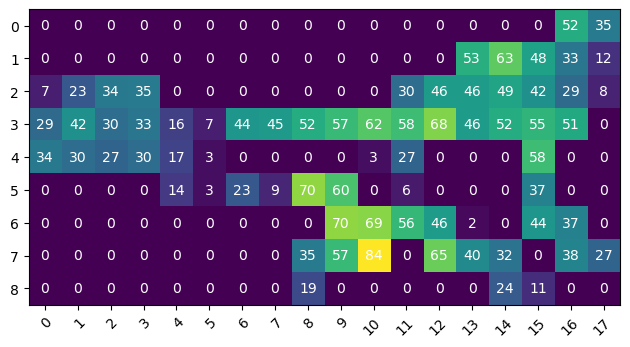

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


vegetables = [*range(avg.shape[0])]
farmers = [*range(avg.shape[1])]

harvest = avg


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(farmers)), labels=farmers,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(vegetables)), labels=vegetables)

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()